# HW04 B0829024

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-04-07 11:56:56--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-04-07 11:56:56--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.003s  

2022-04-07 11:56:57 (15.4 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate
np.random.seed(17)

# Exercise 02

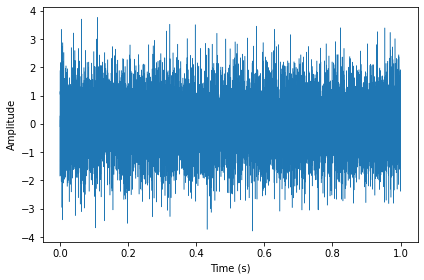

In [ ]:
from thinkdsp import UncorrelatedGaussianNoise

signal = UncorrelatedGaussianNoise()
wave = signal.make_wave(duration=1,framerate=11025)
wave.plot(linewidth=0.5)
decorate(xlabel='Time (s)',
         ylabel='Amplitude')

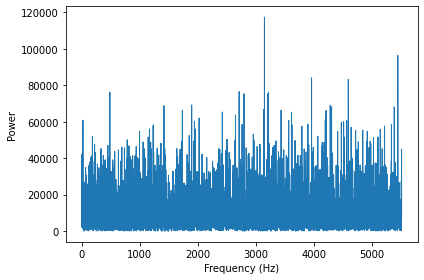

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot_power(linewidth=1)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

In [ ]:
from thinkdsp import Spectrum
def make_Bartlett_spectrum(wave, count=2,full=False):
        """Computes the spectrum using FFT.
        full: boolean, whethere to compute a full FFT
              (as opposed to a real FFT)
        returns: Spectrum
        """
        n = len(wave.ys)
        d = 1 / wave.framerate

        ys_list = []
        fs_list = []

        step = n//count
        for i in range(count):
          ys = np.fft.rfft(wave.ys[i*step : (i+1)*step]) 
          ys_list.append(ys)
          fs = np.fft.rfftfreq(n//count, d)
          fs_list.append(fs)

        ys_list = np.array(ys_list)
        fs_list = np.array(fs_list)

        ys_list = ys_list.mean(axis=0)
        fs_list = fs_list.mean(axis=0)
        return Spectrum(ys_list, fs_list, wave.framerate, full)

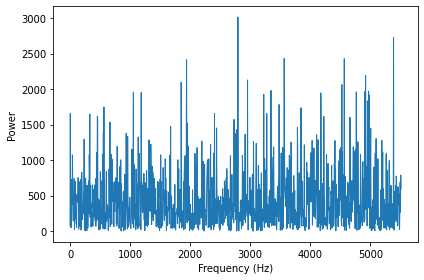

In [ ]:
spectrum = make_Bartlett_spectrum(wave,5)
spectrum.plot_power(linewidth=1)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

上述方法先將wave資料切割成指定的區塊數量，再分別計算每個片段的頻譜，最後在取平均。如果將count(切分數量)增加，可以發現取樣點減少，因為音樂片段變短，fft後頻率密度減小。相反則越多，直到count=1，與一般spectrum相同。

# Exercise 03

In [ ]:
if not os.path.exists('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv

--2022-04-07 12:50:20--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv [following]
--2022-04-07 12:50:21--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143622 (140K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 140.26K  --.-KB/s    in 0.00

In [ ]:
import pandas as pd

df = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv', 
                 parse_dates=[0])
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2354,BTC,2020-03-22,5884.340133,6187.042146,6431.873162,5802.553402
2355,BTC,2020-03-23,6455.454688,5829.352511,6620.858253,5694.198299
2356,BTC,2020-03-24,6784.318011,6455.450650,6863.602196,6406.037439
2357,BTC,2020-03-25,6706.985089,6784.325204,6981.720386,6488.111885


In [ ]:
ys = df['Closing Price (USD)']
ts = df.index

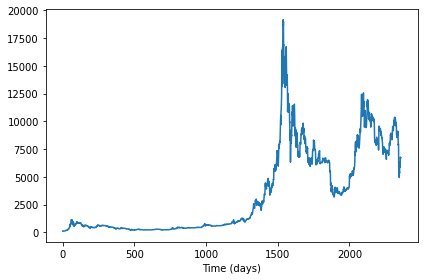

In [ ]:
from thinkdsp import Wave

wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (days)')

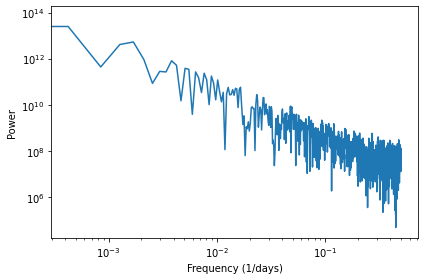

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (1/days)',ylabel='Power',**loglog)

In [ ]:
spectrum.estimate_slope()[0]

-1.7332540936758951

測試結果，比特幣走勢的能量圖與布朗噪聲類似，後續動作隨先前走勢波動，與貨幣或股票交易類似，股票\貨幣的漲跌均建立在先前的基礎上。